On a scrapper le film 28 semaine plus tard car il a une proportion d'avis negatif suffisant pour le rééquilibrage de notre data du notebook sBrief_NLP.

IMPORTATION DE PANDAS ET LECTURE DU FICHIER CSV

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/home/leguibs/Brief_commentaire/csv/28_semaine_brief.csv")
data.head()

,Note,Commentaire
0,"1,0","1 étoile pour quelques scènes.Pour le reste, l..."
1,"2,5",On voit que Danny Boyle n'est plus aux command...
2,"4,0",Une suite largement à la hauteur de l'excellen...
3,"4,0",Suite souvent huée mais finalement supérieur à...
4,"4,5","Suite de la bombe de Danny Boyle, 28 jours plu..."


In [3]:
data.Note = data["Note"].str.replace(",", ".")
data.Note.head()

0    1.0
1    2.5
2    4.0
3    4.0
4    4.5
Name: Note, dtype: object

In [4]:
data.Note = pd.to_numeric(data.Note)
print(data.Note)

0       1.0
1       2.5
2       4.0
3       4.0
4       4.5
       ... 
1323    5.0
1324    1.0
1325    1.0
1326    5.0
1327    1.5
Name: Note, Length: 1328, dtype: float64


In [5]:
data.loc[(data.Note < 3,"Note" )]= 0
data.loc[(data.Note > 3,"Note" )]= 1

In [6]:
data.Note = pd.to_numeric(data.Note, downcast='integer')

In [7]:
data.Note[data.Note == 0]

0       0
1       0
8       0
9       0
10      0
       ..
1314    0
1317    0
1324    0
1325    0
1327    0
Name: Note, Length: 379, dtype: int8

In [8]:
print(data.Note[:20])

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    1
12    1
13    0
14    1
15    1
16    0
17    1
18    1
19    1
Name: Note, dtype: int8


Meme principe que sur le fichier sBrief_NLP on a transformer la colonne "Note" en entier pour ensuite l'encoder en 1 et 0 pour l'integrer en supplément à notre data de base.

In [9]:
data_note_moins_trois = data[data.Note & data.Note == 0]

In [10]:
data.Note = pd.to_numeric(data.Note, downcast='integer')

IMPORTATION DES MODULES POUR L'OBSERVATION GRAPHIQUE DE NOS DONNEES

<Figure size 640x480 with 0 Axes>

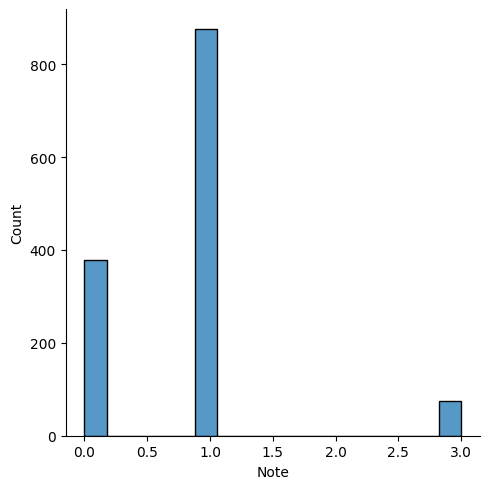

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.displot(data = data, x= data.Note)
plt.show()

TRANSFORMATION DES DONNEES DE NOTRE VARIABLE EN DATAFRAME

In [12]:
data_2 = pd.DataFrame(data_note_moins_trois)
data_note_moins_trois.head()

,Note,Commentaire
0,0,"1 étoile pour quelques scènes.Pour le reste, l..."
1,0,On voit que Danny Boyle n'est plus aux command...
8,0,Sérieusement ????2 gamins qui arrivent à s'éch...
9,0,Mais c'est quoi ce truc sensé être un film d'h...
10,0,Ce 28 semaines plus tard est une suite très pa...


ENREGISTREMENT DU DATAFRAME (data_2) EN FICHIER CSV

In [144]:
data_2.to_csv("/home/leguibs/Brief_commentaire/csv/jours.csv", index= False) # Index = false empeche un rajout d'index supplementaire
                                                                # qui nous aurait dérangé lors de l'assamblage des 2 datasets

LECTURE DES FICHIERS (jours.csv & annuaire_cine_brief.csv) ET CONCATENATION DE NOS 2 DATASETS

In [145]:
data_3 = pd.read_csv("/home/leguibs/Brief_commentaire/csv/jours.csv")
data.head()

,Note,Commentaire
0,0,"1 étoile pour quelques scènes.Pour le reste, l..."
1,0,On voit que Danny Boyle n'est plus aux command...
2,1,Une suite largement à la hauteur de l'excellen...
3,1,Suite souvent huée mais finalement supérieur à...
4,1,"Suite de la bombe de Danny Boyle, 28 jours plu..."


In [146]:
data_bonne = pd.read_csv("/home/leguibs/Brief_commentaire/csv/annuaire_cine_brief.csv")

In [147]:
result = pd.concat([data_bonne, data_3], ignore_index=True)

concatenation de nos 2 fichiers

EXPORTATION DU FICHIER CONCATENER EN CSV

In [148]:
result.to_csv('result.csv', index=False)

A présent on a fichier csv avec notre data augmentation et on auras quasiment la même proportion d'avis positifs et négatifs. Il y avais cependant 42 avis négatifs supplémentaire que je me suis permis d'enlever à la mains dans le fichier result.csv.
Etant données qu'on a rajouter seulement des commentaires négatifs à la fin de notre fichier on a enlever les 42 de dernieres lignes du fichier.